In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

!wget -q https://git.io/JYx2x -O resnet_cifar10_v2.py
import resnet_cifar10_v2

drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'
print(os.listdir(loc+'/Results'))

Mounted at /content/drive/
['self_128_8_breastcancer.csv', 'cosineLoss_128_8_breastcancer (1).csv', 'cosineLoss_128_8_breastcancer.csv', 'cosineLoss_128_8_glaucoma.csv', 'self_128_8_glaucoma.csv', 'self_384_32_covid.csv', 'cosineLoss_384_32_covid.csv', 'cosineLoss_128_8_applescab.csv', 'self_128_8_applescab.csv', 'cosineLoss_128_128_breastcancer.csv', 'self_128_128_breastcancer.csv', 'cosineLoss_128_128_glaucoma.csv', 'self_128_128_glaucoma.csv', 'cosineLoss_128_128_applescab.csv', 'self_128_128_applescab.csv', 'self_384_16_covid.csv', 'cosineLoss_128_64_breastcancer.csv', 'self_128_64_breastcancer.csv', 'self_160_64_breastcancer.csv', 'selfLess_16_breastcancer.csv', 'selfLess_24_breastcancer.csv', 'cosineLoss_128_64_glaucoma.csv', 'selfLess_32_breastcancer.csv', 'self_160_56_breastcancer.csv', 'self_128_64_glaucoma.csv', 'selfLess_40_breastcancer.csv', 'selfLess_48_breastcancer.csv', 'cosineLoss_128_64_applescab.csv', 'selfLess_56_breastcancer.csv', 'self_128_64_applescab.csv', 'selfL

In [ ]:
all_CSV = {}
for filename in os.listdir(loc + 'Results'):
  if '.csv' in filename:
    all_CSV[filename]= pd.read_csv (loc + 'Results/'+ filename)


In [ ]:
cifarselfless=[]
cifarsizes=[]
for filename in os.listdir(loc + 'Results'):
  if 'covid' in filename and 'selfLess' in filename:
    cifarselfless.append (np.max(all_CSV[filename] ['accuracy'].values))
    elisa= filename.index ('_')
    elisa2= filename.index ('_',elisa + 1)
    cifarsizes.append (int(filename[elisa + 1: elisa2]))


In [ ]:
# for filename in os.listdir(loc + 'Results'):
#   if '.csv' in filename and 'breastcancer' in filename:
#     Iris = pd.read_csv(loc + 'Results/'+ filename)
#     if 'val_accuracy' in list(Iris.columns):
#       print (filename)
#       print (Iris.columns)


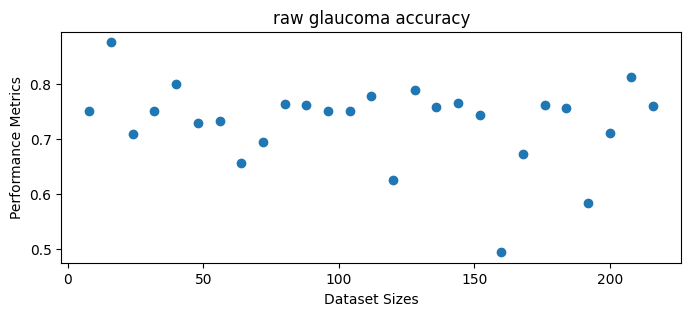

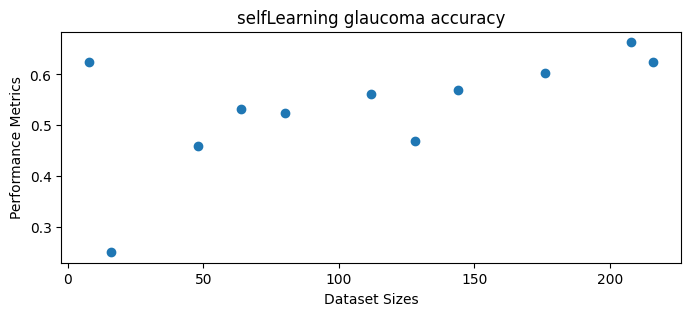

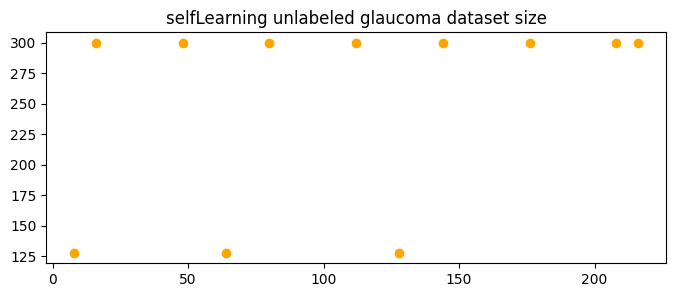

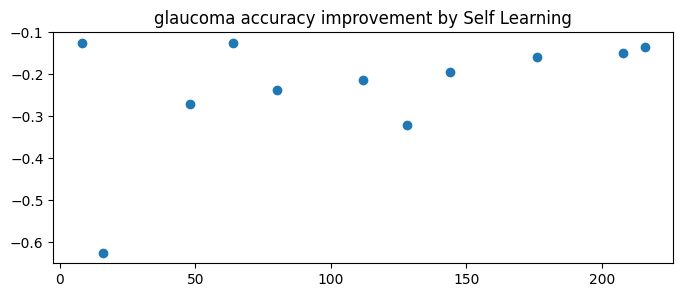

In [ ]:
selfless=[]
littleNs=[]
col = 'accuracy'
# in line 10 and 36 make min if loss and max if accuracy
dataset = 'glaucoma'
for filename in os.listdir(loc + 'Results'):
  if dataset in filename and 'selfLess' in filename:
    df = pd.read_csv(loc + 'Results/'+ filename)
    if col in list(df.columns):
      val = np.max(df[col].values)
      selfless.append (val)
      i0= filename.index ('_')
      i1= filename.index ('_',i0+ 1)
      littleNs.append (int(filename[i0 + 1: i1]))
plt.figure(figsize=(8,3))
plt.scatter(littleNs, selfless)
plt.title('raw '+dataset+ ' ' +col)
plt.xlabel('Dataset Sizes')
plt.ylabel( 'Performance Metrics')
plt.show()

selfLearn=[]
littleNs2=[]
Ns = []
for filename in os.listdir(loc + 'Results'):
  #change 's' to 'S' where little s is your data, and S is my data
  if dataset in filename and 'elf_' in filename:
    df = pd.read_csv(loc + 'Results/'+ filename)
    if col in list(df.columns):
      #selfLearn.append (np.max(df[col].values))
      #print(filename,np.max(df[col].values) )

      i0= filename.index ('_')
      i1= filename.index ('_',i0+ 1)
      i2= filename.index ('_',i1+ 1)
      #littleNs.append (int(filename[i1+1:i2]))
      #Ns.append (int(filename[i0+1:i1]))
      val = np.min(df[col].values)
      N = int(filename[i0+1:i1])
      n = int(filename[i1+1:i2])
      selfLearn.append (val)
      littleNs2.append (n)
      Ns.append (N)

plt.figure(figsize=(8,3))
plt.scatter(littleNs2, selfLearn)
plt.title('selfLearning ' +dataset+ ' ' +col)
plt.xlabel('Dataset Sizes')
plt.ylabel( 'Performance Metrics')
plt.show()
plt.figure(figsize=(8,3))
plt.scatter(littleNs2, Ns, color ='orange')
plt.title('selfLearning unlabeled ' +dataset+ ' dataset size')
plt.show()

sharedLittleNs = []
perfDiff = []
for i in littleNs:
  if i in littleNs2:
    sharedLittleNs.append(i)
    idx1 = littleNs.index(i)
    idx2 = littleNs2.index(i)
    selfLearnPerf = selfLearn[idx2]
    selfLessPerf = selfless[idx1]
    perfDiff.append(selfLearnPerf - selfLessPerf)
plt.figure(figsize=(8,3))
plt.scatter(sharedLittleNs,perfDiff)
plt.title(dataset+' '+col+' improvement by Self Learning')
plt.show()